In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import data_cleaning
import review_score_analysis
import price_range_analysis

In [3]:
# Data Cleaning:

# Adjust as needed, these dataframes are big. No, really
chunk_size = 10_000


# Using these functions, we select businesses marked with the category "restaurant" (case insensitive) and select
# the restaurants with 30 or more reviews, leaving out any restaurants with fewer than that.
restaurants_df = data_cleaning.filter_business_data("data/yelp_academic_dataset_business.json", chunk_size)

# From here, we clean the reviews data by removing any reviews of businesses that aren't in our restaurants_df Dataframe.
reviews_df = data_cleaning.filter_review_data("data/yelp_academic_dataset_review.json", restaurants_df, chunk_size)

In [4]:
# unfilteredUsers=pd.DataFrame()

# userReviewReader=pd.read_json("data/yelp_academic_dataset_user.json", lines=True, chunksize=50000)
# for chunk in userReviewReader:
#     unfilteredUsers = pd.concat([unfilteredUsers, chunk])

In [5]:
# unfilteredReviews.head()

In [6]:
# select the relevant columns for grouping
businessStars=reviews_df[["business_id", "stars"]]
# businessStars.head()
groupedReviews=businessStars.groupby("business_id").mean()
groupedReviews.head()

,stars
business_id,
--ZVrH2X2QXBFdCilbirsw,4.722222
--epgcb7xHGuJ-4PUeSLAw,2.868421
-09Oc2D14vRnmirPh0vlXw,3.021898
-0EdehHjIQc0DtYU8QcAig,3.138889
-0FX23yAacC4bbLaGPvyxw,3.588571


In [7]:
groupedReviewsDF=groupedReviews.reset_index()
groupedReviewsDF=groupedReviewsDF.rename(columns={"business_id": "business_id", "stars" : "average_stars"})
groupedReviewsDF.head()
# join to add average stars to each business.
restaurantsWithAverageStars=pd.merge(restaurants_df, groupedReviewsDF, how="inner", on="business_id")
restaurantsWithAverageStars.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,average_stars
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",4.386792
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",4.200000
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",4.317308
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",3.825000


In [8]:
droppedAttributes=restaurantsWithAverageStars.copy(deep=True)
droppedAttributes=droppedAttributes.dropna(subset="attributes")
# droppedAttributes.head()


# pricedRestaurants=droppedAttributes[(droppedAttributes["attributes"].apply(lambda x: "PriceRange2" in x.keys()))]
# pricedRestaurants.head()
# droppedAttributes.info()

In [9]:
priceRangeList=[]

for entry in droppedAttributes["attributes"]:
    priceRangeList.append(entry.get("RestaurantsPriceRange2"))

In [10]:
droppedAttributes["PriceRange"]=priceRangeList
# droppedAttributes.info()

In [11]:
restaurantsWithPriceRanges=droppedAttributes.dropna(subset="PriceRange")
restaurantsWithPriceRanges=restaurantsWithPriceRanges[restaurantsWithPriceRanges["PriceRange"]!="None"]
# restaurantsWithPriceRanges.info()

C:\Users\Alzier\AppData\Local\Temp\ipykernel_13764\1947786549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes=sns.boxplot(data=restaurantsWithPriceRanges, x="PriceRange", y="average_stars", palette="mako")


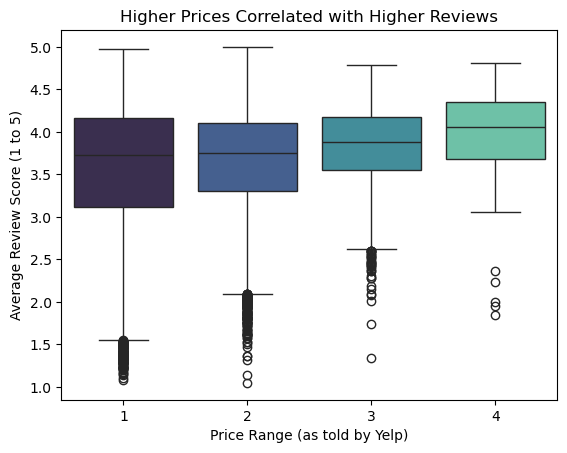

In [12]:
axes=sns.boxplot(data=restaurantsWithPriceRanges, x="PriceRange", y="average_stars", palette="mako")
axes.set_xlabel("Price Range (as told by Yelp)")
axes.set_ylabel("Average Review Score (1 to 5)")
plt.title("Higher Prices Correlated with Higher Reviews")
plt.show()

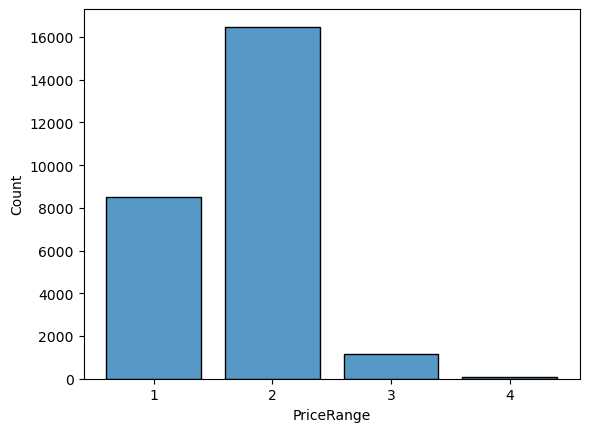

In [13]:
sns.histplot(data=restaurantsWithPriceRanges, x="PriceRange", shrink=.8)
plt.show()

In [25]:
groupedPriceRanges=restaurantsWithPriceRanges[["average_stars", "PriceRange"]].groupby(["PriceRange"]).mean()
groupedPriceRanges.head()

,average_stars
PriceRange,
1,3.558280
2,3.668735
3,3.819725
4,3.952671
